This cell imports essential libraries for data manipulation (pandas), numerical operations (numpy), and data visualization (matplotlib and seaborn).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Environment Setup

This notebook uses a few external libraries that may not be available by default in the execution environment.  
The following installations are required only once per runtime session.

- `category_encoders` is used for target mean encoding of ordinal categorical features.
- `lightgbm` is used for training the gradient boosting regression model.

> ⚠️ Note: These installation cells can be commented out after the first successful run to reduce restart time.


In [2]:
! pip install category_encoders
!pip install lightgbm

This cell configures pandas to display all columns of a DataFrame. This is useful for inspecting dataframes, especially those with many columns, without truncation.

In [3]:
pd.set_option('display.max_columns',None)

This cell loads the training dataset from 'train.csv' into a pandas DataFrame named `train_set`. It also drops the 'id' column, as it's typically a unique identifier and not a feature relevant for model training. Finally, it displays the first few rows of the DataFrame.

In [4]:
train_set = pd.read_csv('train.csv').drop('id',axis = 1)
train_set

,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,21,female,b.sc,7.91,98.8,no,4.9,average,online videos,low,easy,78.300
1,18,other,diploma,4.95,94.8,yes,4.7,poor,self-study,medium,moderate,46.700
2,20,female,b.sc,4.68,92.6,yes,5.8,poor,coaching,high,moderate,99.000
3,19,male,b.sc,2.00,49.5,yes,8.3,average,group study,high,moderate,63.900
4,23,male,bca,7.65,86.9,yes,9.6,good,self-study,high,easy,100.000
...,...,...,...,...,...,...,...,...,...,...,...,...
629995,18,female,b.tech,4.86,70.7,yes,4.1,good,mixed,high,moderate,69.500
629996,21,female,ba,7.08,54.4,yes,4.5,average,mixed,low,moderate,78.900
629997,24,male,bca,0.64,44.2,yes,4.3,poor,online videos,low,moderate,19.599
629998,20,male,b.com,1.54,75.1,yes,8.2,average,group study,high,moderate,59.100


This cell separates the features (`X_train_set`) from the target variable (`y_train_set`) in the `train_set` DataFrame. 'exam_score' is identified as the target variable that the model will predict.

In [5]:
X_train_set, y_train_set = train_set.drop(['exam_score'],axis = 1), train_set['exam_score']

This cell imports the `train_test_split` function from scikit-learn to divide the `X_train_set` and `y_train_set` into actual training (`X_train`, `y_train`) and testing (`X_test`, `y_test`) sets. Given the dataset's substantial size (0.63 million samples), a small `test_size` of 0.005 (approximately 3000 samples) is chosen for the test set. This is sufficient for robust evaluation while maximizing data available for training. `random_state` is set for reproducibility.

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_set,y_train_set,random_state = 42,test_size = 0.005)

In [7]:
X_train.describe()

,age,study_hours,class_attendance,sleep_hours
count,626850.000000,626850.000000,626850.000000,626850.000000
mean,20.545821,4.002005,71.987949,7.072772
std,2.260297,2.359979,17.430020,1.744810
min,17.000000,0.080000,40.600000,4.100000
25%,19.000000,1.970000,57.000000,5.600000
50%,21.000000,4.000000,72.600000,7.100000
75%,23.000000,6.050000,87.200000,8.600000
max,24.000000,7.910000,99.400000,9.900000


In [8]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 626850 entries, 382636 to 121958
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   age               626850 non-null  int64  
 1   gender            626850 non-null  object 
 2   course            626850 non-null  object 
 3   study_hours       626850 non-null  float64
 4   class_attendance  626850 non-null  float64
 5   internet_access   626850 non-null  object 
 6   sleep_hours       626850 non-null  float64
 7   sleep_quality     626850 non-null  object 
 8   study_method      626850 non-null  object 
 9   facility_rating   626850 non-null  object 
 10  exam_difficulty   626850 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 57.4+ MB


This cell calculates and displays the frequency count of unique values in the 'gender' column of `X_train`. This is an important step in exploratory data analysis for categorical features to understand their distribution and identify any imbalances.

In [9]:
X_train['gender'].value_counts()

,count
gender,
other,210087
male,209518
female,207245


This cell calculates and displays the frequency count of unique values in the 'course' column of `X_train`. This helps in understanding the distribution of students across different courses and can highlight popular or less common courses.

In [10]:
X_train['course'].value_counts()

,count
course,
b.tech,130582
b.sc,111013
b.com,110399
bca,88282
bba,75229
ba,61694
diploma,49651


This cell calculates and displays the frequency count of unique values in the 'internet_access' column of `X_train`. This provides insight into how many students have or do not have internet access, which could be a significant factor in their academic performance.

In [11]:
X_train['internet_access'].value_counts()

,count
internet_access,
yes,576573
no,50277


In [12]:
X_train['sleep_quality'].value_counts()

,count
sleep_quality,
poor,212592
good,212016
average,202242


In [13]:
X_train['study_method'].value_counts()

,count
study_method,
coaching,131029
self-study,130441
mixed,122470
group study,122418
online videos,120492


In [14]:
X_train['facility_rating'].value_counts()

,count
facility_rating,
medium,212994
low,211310
high,202546


In [15]:
X_train['exam_difficulty'].value_counts()

,count
exam_difficulty,
moderate,352195
easy,175657
hard,98998


*   **Ordinal Categorical Features**: These features have categories with a meaningful order or ranking, but the intervals between categories are not necessarily uniform or quantifiable. An example provided from the dataset is 'exam\_difficulty'.
*   **Nominal Categorical Features**: These features have categories that do not have an intrinsic order or ranking. An example provided from the dataset is 'gender'.

In [16]:
ordinal_categorical_features = ['exam_difficulty','facility_rating','sleep_quality']
nominal_categorical_features = ['study_method','course','gender']

This cell generates a histogram to visualize the distribution of ages within the `X_train` dataset. It helps to understand the age demographic of the students.

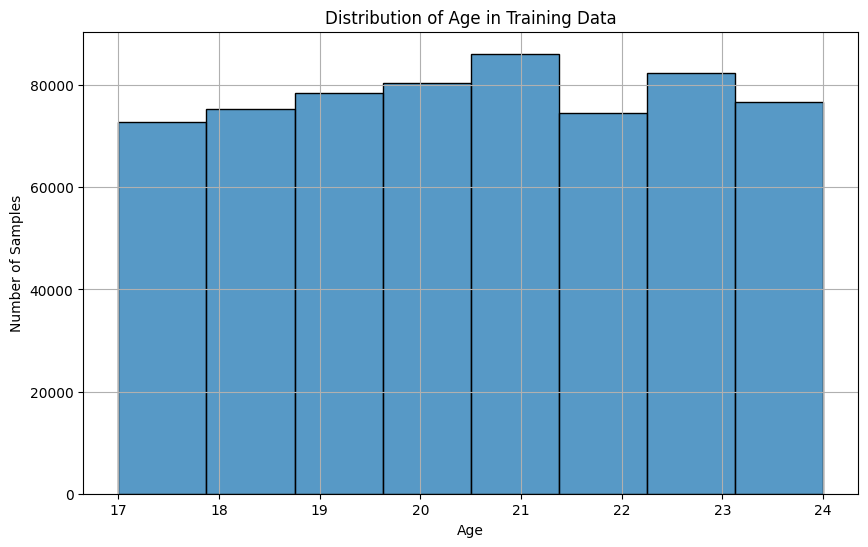

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(x=X_train['age'], bins=len(X_train['age'].unique()))
plt.title('Distribution of Age in Training Data')
plt.xlabel('Age')
plt.ylabel('Number of Samples')
plt.grid(True)
plt.show()

This cell generates a histogram with a Kernel Density Estimate (KDE) to visualize the distribution of 'study_hours' in the training data. It helps in understanding the common study hour ranges among students.

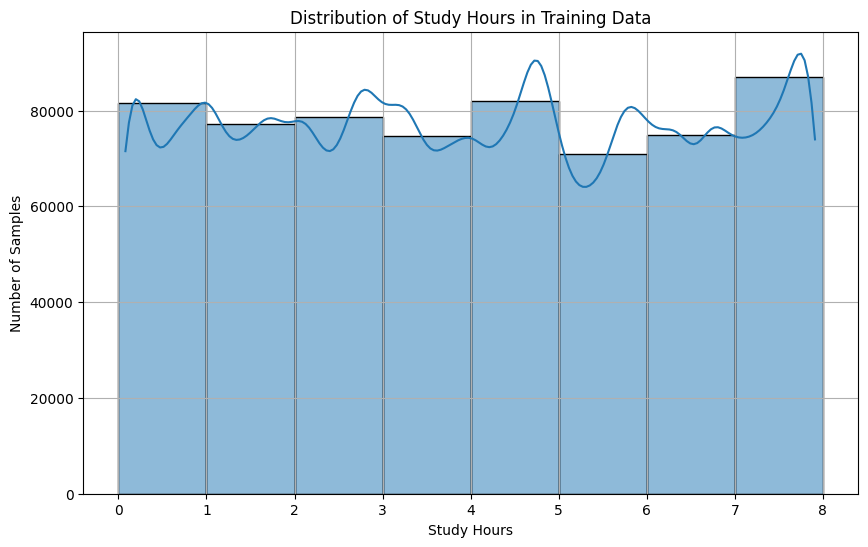

In [18]:
plt.figure(figsize=(10, 6))
bins = np.arange(0, X_train['study_hours'].max() + 1, 1) # Create bins for each integer study hour
sns.histplot(x=X_train['study_hours'], bins=bins, kde=True)
plt.title('Distribution of Study Hours in Training Data')
plt.xlabel('Study Hours')
plt.ylabel('Number of Samples')
plt.grid(True)
plt.xticks(bins)
plt.show()

This cell creates a box plot to visualize the distribution of 'exam_score' based on whether students have 'internet_access' or not. This helps in understanding the potential impact of internet access on exam performance.

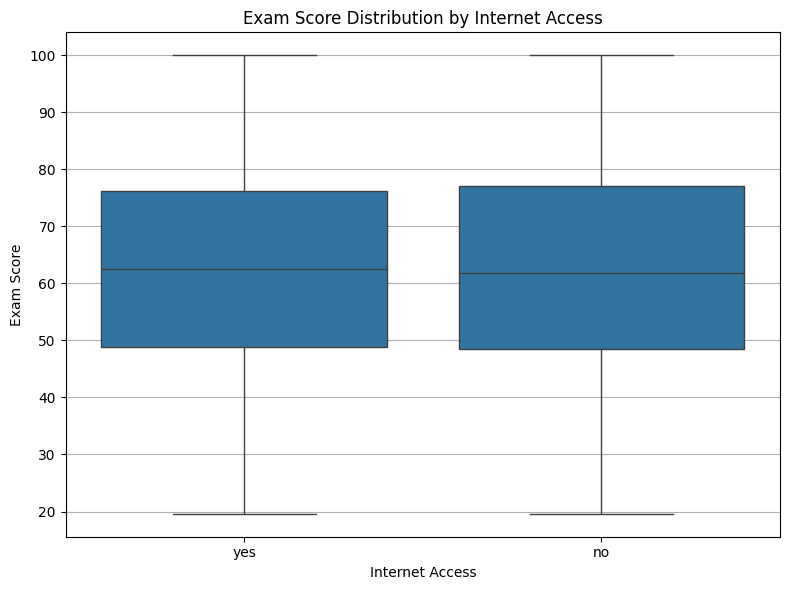

In [19]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=X_train['internet_access'], y=y_train)
plt.title('Exam Score Distribution by Internet Access')
plt.xlabel('Internet Access')
plt.ylabel('Exam Score')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

This cell generates a regression plot to show the relationship between 'age' and 'exam_score'. The scatter plot points are made semi-transparent (`alpha=0.3`), and a red regression line is added to indicate the trend.

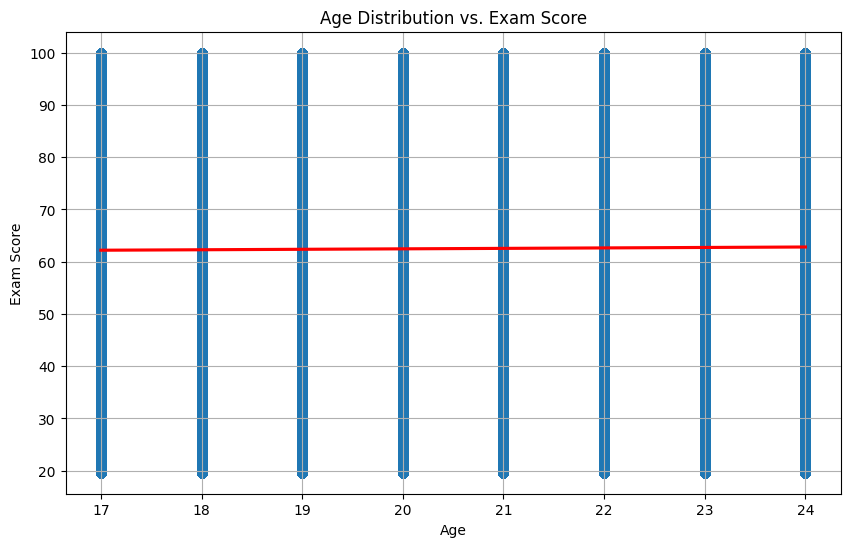

In [20]:
plt.figure(figsize=(10, 6))
sns.regplot(x=X_train['age'], y=y_train, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Age Distribution vs. Exam Score')
plt.xlabel('Age')
plt.ylabel('Exam Score')
plt.grid(True)
plt.show()

This cell creates a box plot to visualize the distribution of 'exam_score' across different 'course' types. This helps in understanding how exam performance varies by academic program.

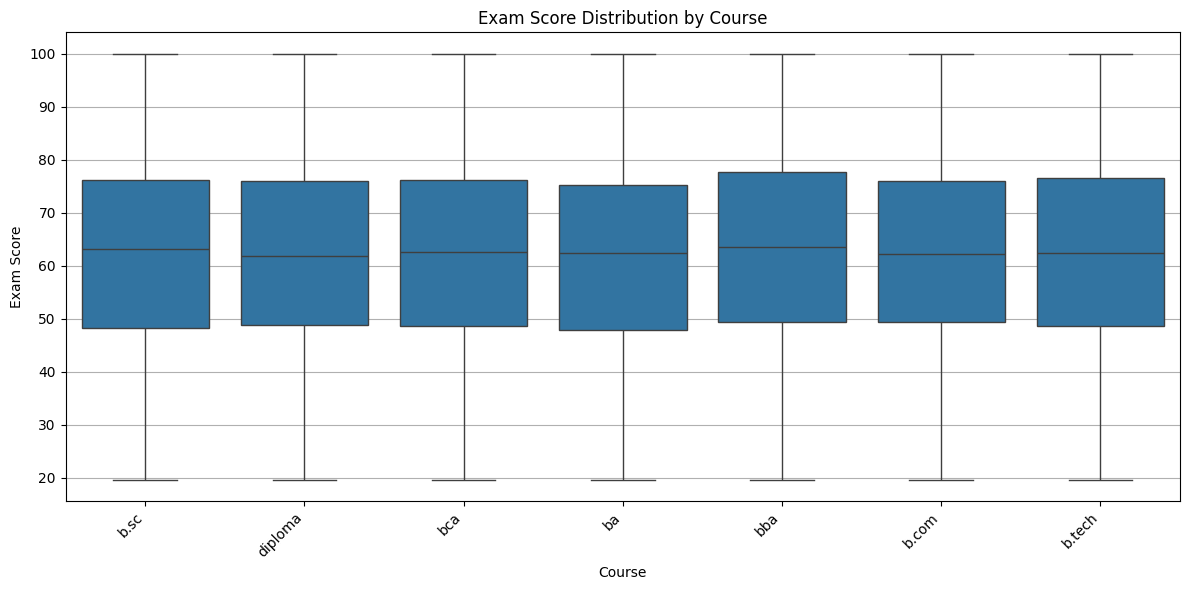

In [21]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=X_train['course'], y=y_train)
plt.title('Exam Score Distribution by Course')
plt.xlabel('Course')
plt.ylabel('Exam Score')
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

This cell generates a regression plot to visualize the relationship between 'study_hours' and 'exam_score'. It includes a scatter plot with semi-transparent points and a green regression line to highlight the trend.

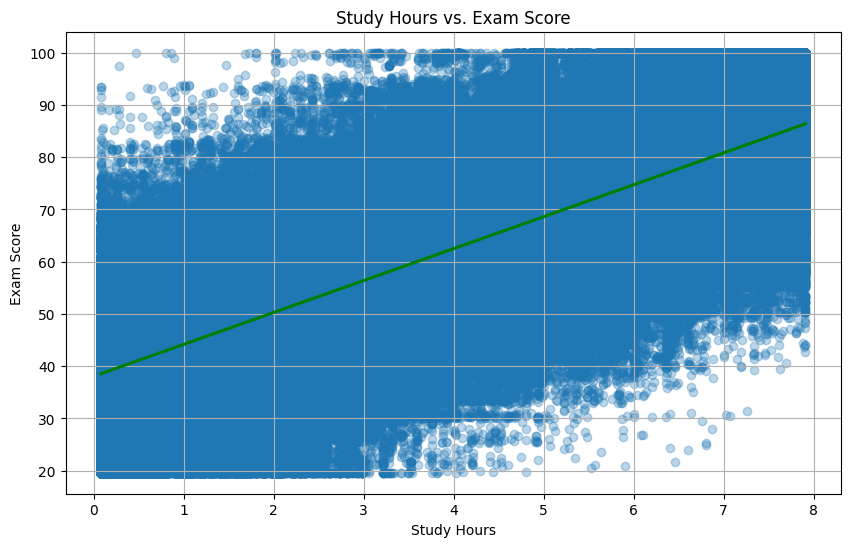

In [22]:
plt.figure(figsize=(10, 6))
sns.regplot(x=X_train['study_hours'], y=y_train, scatter_kws={'alpha':0.3}, line_kws={'color':'green'})
plt.title('Study Hours vs. Exam Score')
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.grid(True)
plt.show()

This cell generates a regression plot to visualize the relationship between 'class_attendance' and 'exam_score'. It includes a scatter plot with semi-transparent points and a blue regression line to indicate the trend.

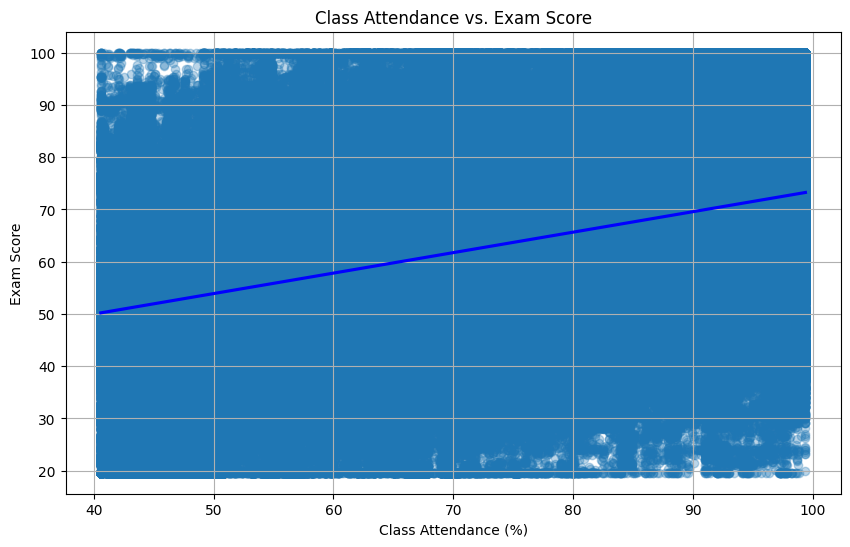

In [23]:
plt.figure(figsize=(10, 6))
sns.regplot(x=X_train['class_attendance'], y=y_train, scatter_kws={'alpha':0.3}, line_kws={'color':'blue'})
plt.title('Class Attendance vs. Exam Score')
plt.xlabel('Class Attendance (%)')
plt.ylabel('Exam Score')
plt.grid(True)
plt.show()

This cell creates a box plot to visualize the distribution of 'exam_score' across different 'facility_rating' levels. This helps in understanding the potential impact of facility quality on exam performance.

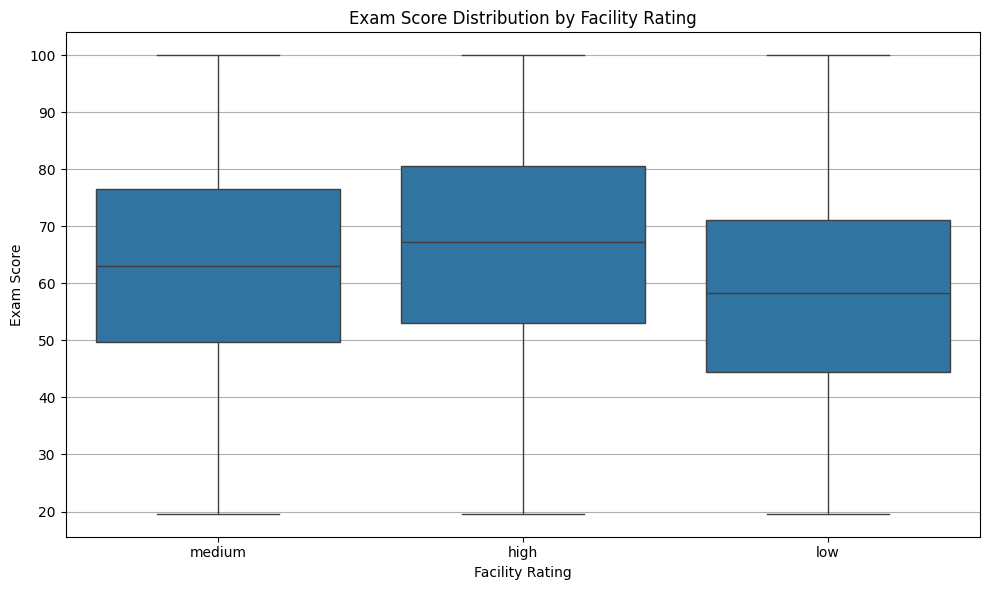

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=X_train['facility_rating'], y=y_train)
plt.title('Exam Score Distribution by Facility Rating')
plt.xlabel('Facility Rating')
plt.ylabel('Exam Score')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

This cell creates a box plot to visualize the distribution of 'exam_score' based on 'sleep_quality'. This helps in understanding the potential impact of sleep quality on exam performance.

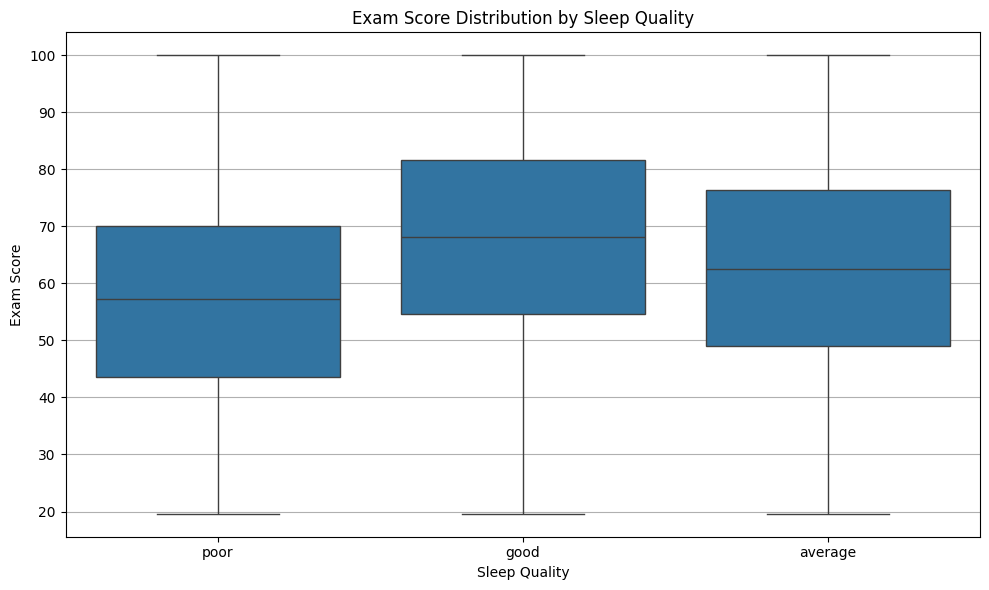

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=X_train['sleep_quality'], y=y_train)
plt.title('Exam Score Distribution by Sleep Quality')
plt.xlabel('Sleep Quality')
plt.ylabel('Exam Score')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

This cell generates a regression plot to visualize the relationship between 'sleep_hours' and 'exam_score'. It includes a scatter plot with semi-transparent points and a purple regression line to indicate the trend

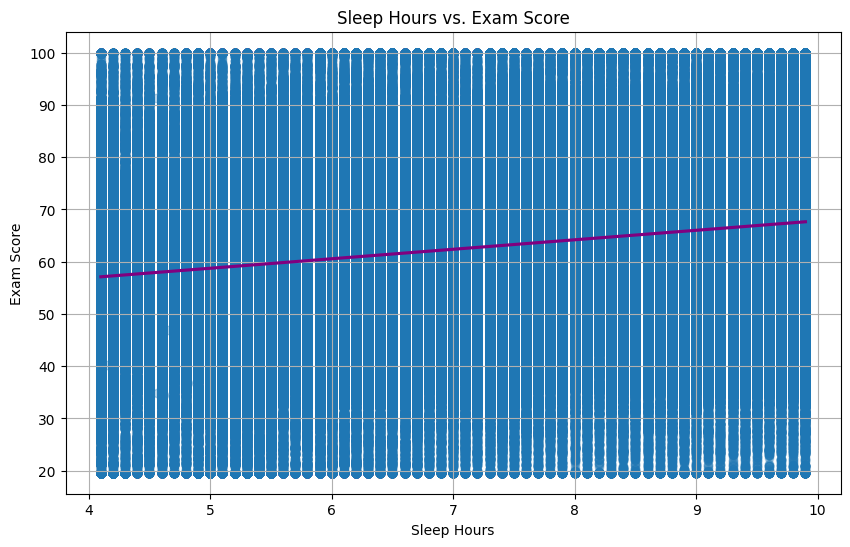

In [26]:
plt.figure(figsize=(10, 6))
sns.regplot(x=X_train['sleep_hours'], y=y_train, scatter_kws={'alpha':0.3}, line_kws={'color':'purple'})
plt.title('Sleep Hours vs. Exam Score')
plt.xlabel('Sleep Hours')
plt.ylabel('Exam Score')
plt.grid(True)
plt.show()

This cell creates a box plot to visualize the distribution of 'exam_score' across different 'exam_difficulty' levels. This helps in understanding how exam performance varies with the perceived difficulty of exams.

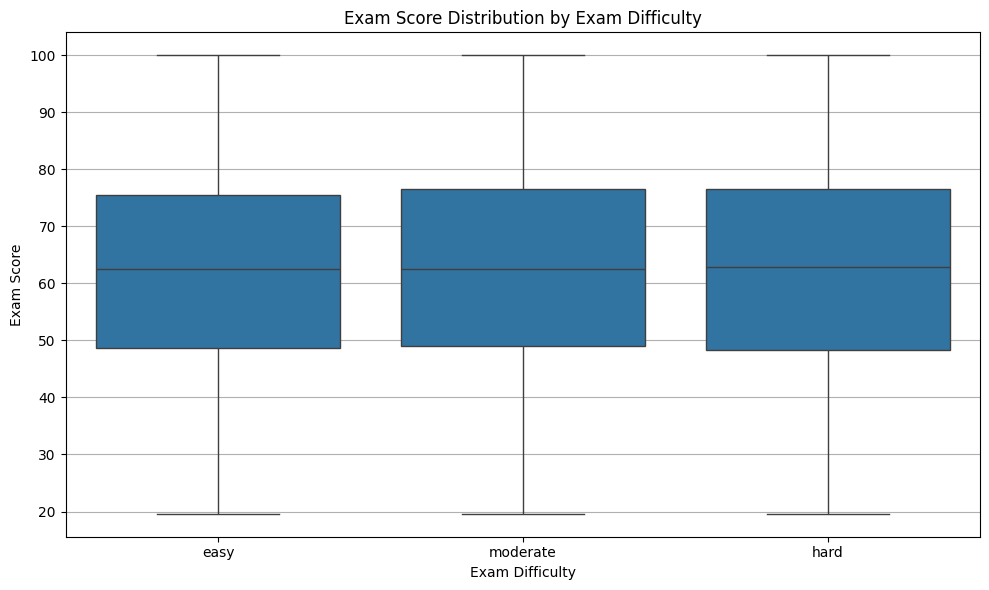

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=X_train['exam_difficulty'], y=y_train)
plt.title('Exam Score Distribution by Exam Difficulty')
plt.xlabel('Exam Difficulty')
plt.ylabel('Exam Score')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

This cell creates a box plot to visualize the distribution of 'exam_score' across different 'study_method' categories. This helps in understanding how various study approaches might influence exam performance.

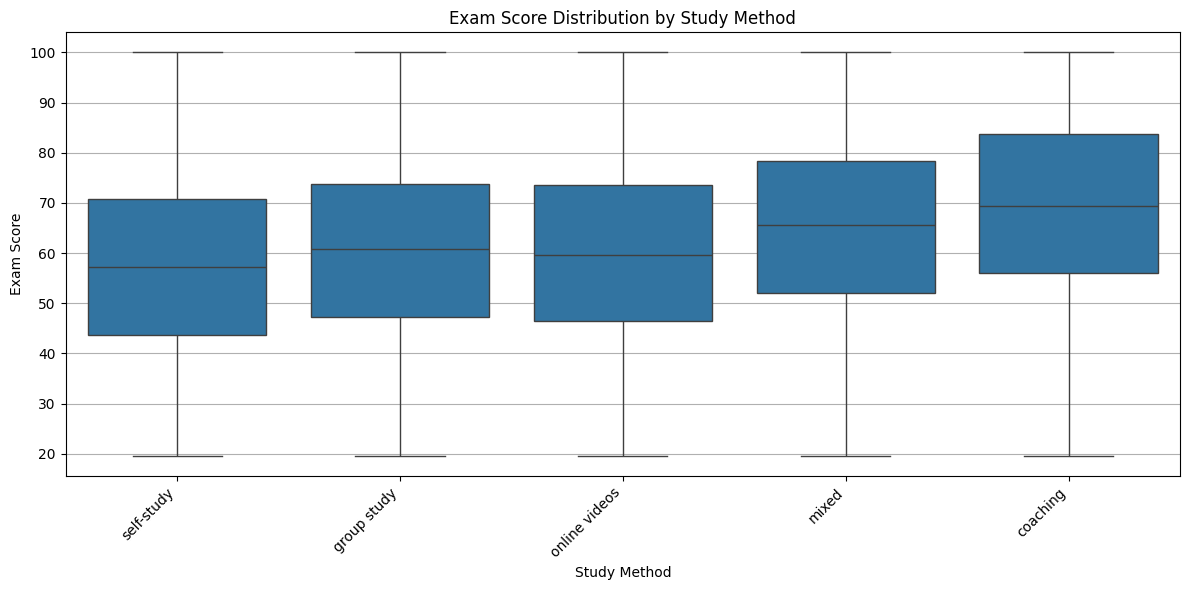

In [28]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=X_train['study_method'], y=y_train)
plt.title('Exam Score Distribution by Study Method')
plt.xlabel('Study Method')
plt.ylabel('Exam Score')
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

In [29]:
numerical_features = ['age','study_hours','class_attendance','sleep_hours']

## Preprocessor Initialization (Feature Name Extraction Only)

The preprocessor is explicitly fitted **once** at this stage for a single purpose:

- To extract transformed feature names required for downstream custom feature engineering.

This fit is **not** used for model training or evaluation.

### Why this does NOT cause data leakage:
- During cross-validation and out-of-fold (OOF) prediction generation, the entire pipeline is **cloned**.
- Each clone refits the preprocessor **only on the fold-specific training data**.
- The globally fitted preprocessor is never reused for learning target-dependent statistics.

This design allows safe feature engineering while preserving strict CV integrity.


In [30]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from category_encoders import TargetEncoder

preprocessor = ColumnTransformer(
    transformers=[
        ('internet_access_transformer',
         FunctionTransformer(
             func=lambda x: x.iloc[:, 0].map({'yes': 1, 'no': 0}).values.reshape(-1, 1),
             validate=False
         ),
         ['internet_access']),

        ('target_mean_transformer',
         TargetEncoder(smoothing=10),
         ordinal_categorical_features),

        ('onehot_transformer',
         OneHotEncoder(handle_unknown='ignore'),
         nominal_categorical_features),

        ('numerical_transformer',
         StandardScaler(),
         numerical_features)
    ],
    remainder='drop'
)


In [31]:
preprocessor.fit(X_train,y_train)

ColumnTransformer(transformers=[('internet_access_transformer',
                                 FunctionTransformer(func=<function <lambda> at 0x7b7c96a38720>),
                                 ['internet_access']),
                                ('target_mean_transformer', TargetEncoder(),
                                 ['exam_difficulty', 'facility_rating',
                                  'sleep_quality']),
                                ('onehot_transformer',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['study_method', 'course', 'gender']),
                                ('numerical_transformer', StandardScaler(),
                                 ['age', 'study_hours', 'class_attendance',
                                  'sleep_hours'])])

## Processed Feature Name Construction

After preprocessing, the feature space expands due to:
- Target mean encoding of ordinal categorical features
- One-hot encoding of nominal categorical features
- Scaling of numerical features

This helper function reconstructs the transformed feature names so that
custom interaction features can be added in a transparent and interpretable way.


In [32]:
def get_processed_column_names(preprocessor):
    onehot_names = preprocessor.named_transformers_[
        'onehot_transformer'
    ].get_feature_names_out(nominal_categorical_features)

    return (
        ['internet_access']
        + [f'{col}_target_mean' for col in ordinal_categorical_features]
        + list(onehot_names)
        + numerical_features
    )


## Custom Feature Engineering

In addition to standard preprocessing, domain-inspired interaction features are introduced:

- **Quality-adjusted sleep hours**: combines sleep duration with sleep quality
- **Attendance-weighted study hours**: combines study time with class attendance

These engineered features are designed to capture meaningful real-world interactions
that linear and tree-based models can exploit differently.


In [33]:
def add_features(X_array):
    df = pd.DataFrame(
        X_array,
        columns= get_processed_column_names(preprocessor)
    )

    df['quality_sleep_hours'] = (
        df['sleep_hours'] * df['sleep_quality_target_mean']
    )

    df['attended_study_hours'] = (
        df['study_hours'] * df['class_attendance']
    )

    return df.values

## Baseline Model: Linear Regression

A linear regression model is used as a strong baseline to capture:

- Global linear trends
- Additive relationships between features and exam score

This model provides interpretability and serves as a complementary learner
to the non-linear LightGBM model used later.


In [34]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

linear_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('feature_engineering', FunctionTransformer(add_features, validate=False)),
    ('model', LinearRegression())
])

In [35]:
linear_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('internet_access_transformer',
                                                  FunctionTransformer(func=<function <lambda> at 0x7b7c96a38720>),
                                                  ['internet_access']),
                                                 ('target_mean_transformer',
                                                  TargetEncoder(),
                                                  ['exam_difficulty',
                                                   'facility_rating',
                                                   'sleep_quality']),
                                                 ('onehot_transformer',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['study_method', 'course',
                                                   'gender']),
                                                 ('numerical_transformer',
                                                  StandardScaler(),
                                                  ['age', 'study_hours',
                                                   'class_attendance',
                                                   'sleep_hours'])])),
                ('feature_engineering',
                 FunctionTransformer(func=<function add_features at 0x7b7c95a48360>)),
                ('model', LinearRegression())])

In [36]:
linear_predicted = linear_pipeline.predict(X_test)
linear_predicted

array([60.57869271, 47.51014195, 61.76089935, ..., 42.78869329,
       87.81535632, 82.31989439])

In [37]:
from sklearn.metrics import root_mean_squared_error
root_mean_squared_error(y_test,linear_predicted)

8.71053563045392

In [38]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,linear_predicted)

6.937661420530914

In [39]:
from sklearn.metrics import r2_score
r2_score(y_test,linear_predicted)

0.7855642659689995

## Non-Linear Model: LightGBM Regressor

LightGBM is employed to model:

- Non-linear feature interactions
- Threshold effects
- Complex conditional relationships

Compared to linear regression, LightGBM can exploit higher-order patterns,
making it a strong candidate for ensemble learning.


In [40]:
from lightgbm import LGBMRegressor
lgbm_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('feature_engineering', FunctionTransformer(add_features, validate=False)),
    ('model', LGBMRegressor(
        objective='regression',
        n_estimators=3000,
        learning_rate=0.01,
        num_leaves=24,
        max_depth=5,
        min_child_samples=50,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=1.0,
        reg_lambda=1.0,
        random_state=42,
        n_jobs=-1,
        force_col_wise=True
    ))
])

In [41]:
lgbm_pipeline.fit(X_train,y_train)

[LightGBM] [Info] Total Bins 1049
[LightGBM] [Info] Number of data points in the train set: 626850, number of used features: 25
[LightGBM] [Info] Start training from score 62.505733


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('internet_access_transformer',
                                                  FunctionTransformer(func=<function <lambda> at 0x7b7c96a38720>),
                                                  ['internet_access']),
                                                 ('target_mean_transformer',
                                                  TargetEncoder(),
                                                  ['exam_difficulty',
                                                   'facility_rating',
                                                   'sleep_quality']),
                                                 ('onehot_transformer',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['study_method...
                                                   'sleep_hours'])])),
                ('feature_engineering',
                 FunctionTransformer(func=<function add_features at 0x7b7c95a48360>)),
                ('model',
                 LGBMRegressor(colsample_bytree=0.8, force_col_wise=True,
                               learning_rate=0.01, max_depth=5,
                               min_child_samples=50, n_estimators=3000,
                               n_jobs=-1, num_leaves=24, objective='regression',
                               random_state=42, reg_alpha=1.0, reg_lambda=1.0,
                               subsample=0.8))])

In [42]:
lgbm_predicted = lgbm_pipeline.predict(X_test)
lgbm_predicted

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


array([60.87555328, 46.8546501 , 61.13912575, ..., 44.08859927,
       87.42036556, 80.97996683])

In [43]:
root_mean_squared_error(y_test,lgbm_predicted)

8.575518517284124

In [44]:
mean_absolute_error(y_test,lgbm_predicted)

6.814382769232357

In [45]:
r2_score(y_test,lgbm_predicted)

0.7921604402636637

In [46]:
from sklearn.model_selection import KFold
from sklearn.base import clone
from sklearn.linear_model import Ridge

## Out-of-Fold (OOF) Prediction Generation

To enable stacking without data leakage, out-of-fold predictions are generated
using K-Fold cross-validation.

Key properties:
- The pipeline is **cloned** for each fold.
- Each clone is trained only on the fold-specific training data.
- Validation predictions are collected to form unbiased OOF estimates.

These OOF predictions serve as training data for the meta-model.


In [47]:
def get_oof_predictions(pipeline, X, y, n_splits=5, random_state=42):
    oof_preds = np.zeros(len(X))

    kf = KFold(
        n_splits=n_splits,
        shuffle=True,
        random_state=random_state
    )

    for fold, (train_idx, val_idx) in enumerate(kf.split(X)):
        X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_tr = y.iloc[train_idx]

        model = clone(pipeline)
        model.fit(X_tr, y_tr)

        oof_preds[val_idx] = model.predict(X_val)

        print(f"Fold {fold + 1} completed")

    return oof_preds


In [48]:
oof_linear = get_oof_predictions(
    linear_pipeline,
    X_train,
    y_train,
    n_splits=5
)

Fold 1 completed
Fold 2 completed
Fold 3 completed
Fold 4 completed
Fold 5 completed


In [49]:
oof_lgbm = get_oof_predictions(
    lgbm_pipeline,
    X_train,
    y_train,
    n_splits=5
)

[LightGBM] [Info] Total Bins 1050
[LightGBM] [Info] Number of data points in the train set: 501480, number of used features: 25
[LightGBM] [Info] Start training from score 62.506383
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fold 1 completed
[LightGBM] [Info] Total Bins 1050
[LightGBM] [Info] Number of data points in the train set: 501480, number of used features: 25
[LightGBM] [Info] Start training from score 62.525090


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fold 2 completed
[LightGBM] [Info] Total Bins 1051
[LightGBM] [Info] Number of data points in the train set: 501480, number of used features: 25
[LightGBM] [Info] Start training from score 62.504186


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fold 3 completed
[LightGBM] [Info] Total Bins 1049
[LightGBM] [Info] Number of data points in the train set: 501480, number of used features: 25
[LightGBM] [Info] Start training from score 62.501477
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fold 4 completed
[LightGBM] [Info] Total Bins 1050
[LightGBM] [Info] Number of data points in the train set: 501480, number of used features: 25
[LightGBM] [Info] Start training from score 62.491530
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fold 5 completed


## Base Model Prediction Correlation Analysis

Before stacking, the correlation between the OOF predictions of the base models
is examined.

Lower or moderate correlation indicates complementary learning behavior,
which is a strong justification for stacking.


In [50]:
corr = np.corrcoef(oof_lgbm, oof_linear)[0, 1]
print("OOF prediction correlation:", corr)

OOF prediction correlation: 0.9968273912791467


## Stacking Meta-Model

A Ridge Regression model is used as the meta-learner to combine:

- Linear Regression predictions
- LightGBM predictions

Ridge regularization helps stabilize the ensemble by preventing
over-reliance on any single base model.


In [51]:
stack_X = np.column_stack([
    oof_linear,
    oof_lgbm,
])

meta_model = Ridge(alpha=1.0)
meta_model.fit(stack_X, y_train)

print("Blend weights [Linear, LGBM]:", meta_model.coef_)

Blend weights [Linear, LGBM]: [-0.09142864  1.09201966]


In [52]:
oof_blend = meta_model.predict(stack_X)

oof_rmse = root_mean_squared_error(
    y_train,
    oof_blend
)

print("OOF RMSE (Linear + LGBM stack):", oof_rmse)

OOF RMSE (Linear + LGBM stack): 8.778377826302535


## Final Evaluation and Test Set Prediction

After training the meta-model:
- Base models trained on the full training data are reused
- Test predictions are generated
- Final ensemble performance is evaluated

This ensures consistency between validation and submission pipelines.


In [53]:
test_pred_linear = linear_pipeline.predict(X_test)
test_pred_lgbm = lgbm_pipeline.predict(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [54]:
test_stack = np.column_stack([
    test_pred_linear,
    test_pred_lgbm,
])

final_test_predictions = meta_model.predict(test_stack)

In [55]:
root_mean_squared_error(y_test,final_test_predictions)

8.572676930060679

In [56]:
mean_absolute_error(y_test,final_test_predictions)

6.809195579989638

In [57]:
r2_score(y_test,final_test_predictions)

0.7922981570411419

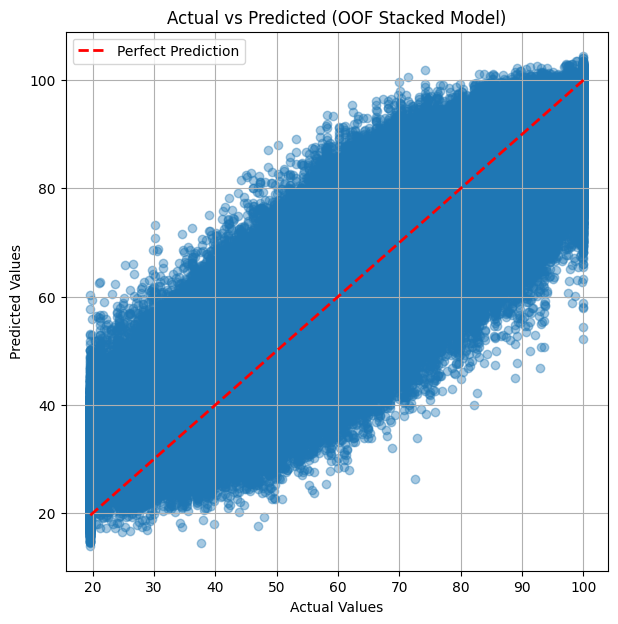

In [58]:
plt.figure(figsize=(7, 7))
plt.scatter(y_train, oof_blend, alpha=0.4)
plt.plot(
    [y_train.min(), y_train.max()],
    [y_train.min(), y_train.max()],
    'r--',
    lw = 2,
    label = 'Perfect Prediction'
)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (OOF Stacked Model)")
plt.legend()
plt.grid(True)
plt.show()

## Residual Diagnostics for the Stacked Model

Residual analysis is performed to assess:
- Bias patterns
- Variance behavior
- Error distribution symmetry

Well-behaved residuals indicate a stable and reliable regression model.


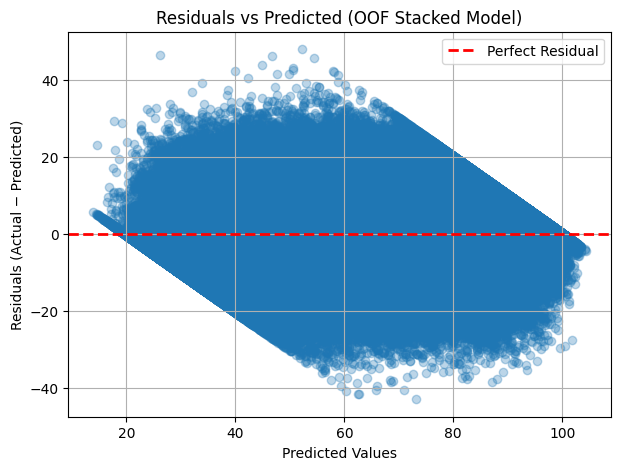

In [59]:
residuals = y_train - oof_blend

plt.figure(figsize=(7, 5))
plt.scatter(oof_blend, residuals, alpha=0.3)
plt.axhline(0,color = 'r',linestyle = '--',lw = 2,label = 'Perfect Residual')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Actual − Predicted)")
plt.title("Residuals vs Predicted (OOF Stacked Model)")
plt.grid(True)
plt.legend()
plt.show()

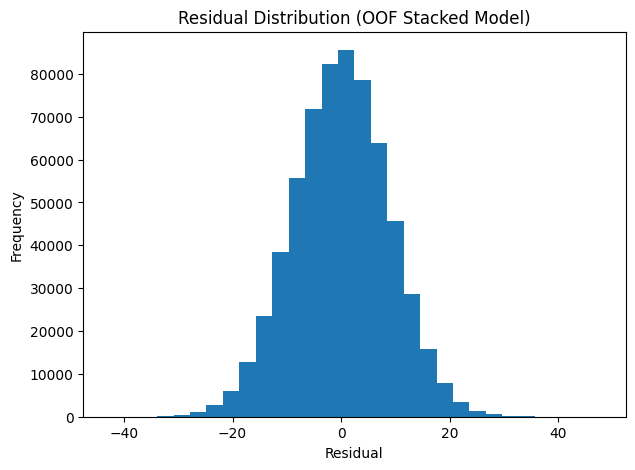

In [60]:
plt.figure(figsize=(7, 5))
plt.hist(residuals, bins=30)
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.title("Residual Distribution (OOF Stacked Model)")
plt.show()

In [61]:
print(f"Mean residual: {residuals.mean():.5f}")

Mean residual: -0.00000


In [62]:
true_test_df = pd.read_csv('test.csv')
true_test_set = true_test_df.drop('id', axis=1)
true_test_set_id = true_test_df['id']

In [63]:
true_test_pred_linear = linear_pipeline.predict(true_test_set)
true_test_pred_lgbm = lgbm_pipeline.predict(true_test_set)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [64]:
true_test_stack = np.column_stack([
    true_test_pred_linear,
    true_test_pred_lgbm
])

true_test_predicted = meta_model.predict(true_test_stack)

This cell loads and displays the `sample_submission.csv` file, which provides the required format for submitting predictions.

In [65]:
pd.read_csv('sample_submission.csv')

,id,exam_score
0,630000,0
1,630001,0
2,630002,0
3,630003,0
4,630004,0
...,...,...
269995,899995,0
269996,899996,0
269997,899997,0
269998,899998,0


## Submission File Generation

The final predictions are mapped to the corresponding test IDs
and saved in the required submission format.

This file can be directly uploaded for evaluation.


In [66]:
true_test_submission = {'id':true_test_set_id,'exam_score':true_test_predicted}
true_test_submission_df = pd.DataFrame(true_test_submission)
true_test_submission_df.to_csv('kaggle_test_submission.csv',index = False)

In [67]:
import joblib
joblib.dump(meta_model,'meta_model.joblib')
print('Model saved successfully')

Model saved successfully
